In [236]:
import os
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker
from datetime import datetime
import numpy as np
import re
import matplotlib.dates as dates
from pandasql import sqldf

In [237]:
df = pd.read_csv('u05smevosb02_srv01_access.log.gz_csv.gz', header=None, sep=';', parse_dates = True)
df.columns = ['IP','DateTime','Method','Endpoint','Protocol','ResponceCode','Number']
df['DateTime'] = pd.to_datetime(df.DateTime, format = "%d/%b/%Y:%H:%M:%S %z")
df2 = df.loc[df["DateTime"].between("2015-02-06 00:00:00+03:00", "2015-02-06 23:59:59+03:00")]
df2['DateTime'] = pd.to_datetime(df["DateTime"].dt.strftime('%d-%b-%Y %H:%M'))
df_rps = df2.groupby(['DateTime'], as_index=False)['Endpoint'].count()

d:\Users\user\AppData\Local\Temp/ipykernel_2032/2526450694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['DateTime'] = pd.to_datetime(df["DateTime"].dt.strftime('%d-%b-%Y %H:%M'))


In [215]:
x = df_rps['DateTime']
y = df_rps['Endpoint']

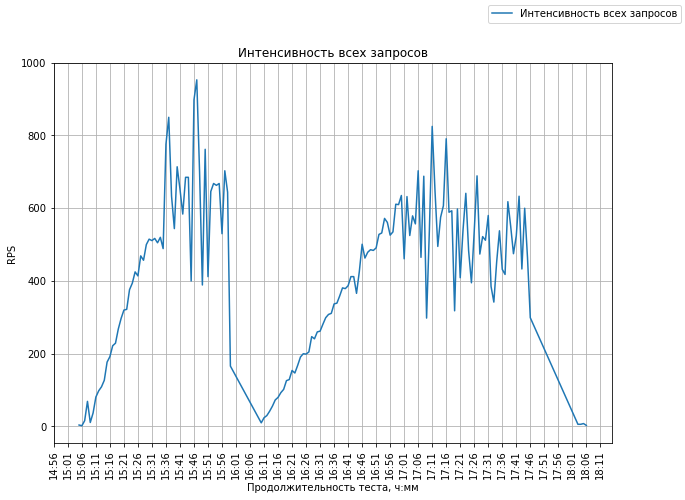

In [216]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(dates.MinuteLocator(interval=5))
ax1.grid(True)
plt.xticks(rotation=90)
ax1.set_title('Интенсивность всех запросов')
ax1.set_xlabel('Продолжительность теста, ч:мм')
ax1.set_ylabel('RPS')
ax1.plot(x,y,label='Интенсивность всех запросов')
fig.legend()
plt.show()

In [265]:
df3 = df.loc[df["DateTime"].between("2015-02-06 00:00:00+03:00", "2015-02-06 23:59:59+03:00")]
df3['DateTime'] = pd.to_datetime(df["DateTime"].dt.strftime('%Y-%b-%d %H:%M'))

d:\Users\user\AppData\Local\Temp/ipykernel_2032/613949027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['DateTime'] = pd.to_datetime(df["DateTime"].dt.strftime('%Y-%b-%d %H:%M'))


In [266]:
df_200 = df3.loc[df3['ResponceCode'] == 200]
df_200 = df_200.groupby(['DateTime'], as_index=False)['ResponceCode'].count()

In [267]:
df_500 = df3.loc[df3['ResponceCode'] == 500]
df_500 = df_500.groupby(['DateTime'], as_index=False)['ResponceCode'].count()

In [268]:
df_200 = pd.merge(df_200,df_500[['DateTime','ResponceCode']],on='DateTime', how='left')
df_200['ResponceCode_y'] = df_200['ResponceCode_y'].fillna(0)

In [269]:
x = df_200['DateTime']
y = df_200['ResponceCode_x']
z = df_200['ResponceCode_y']

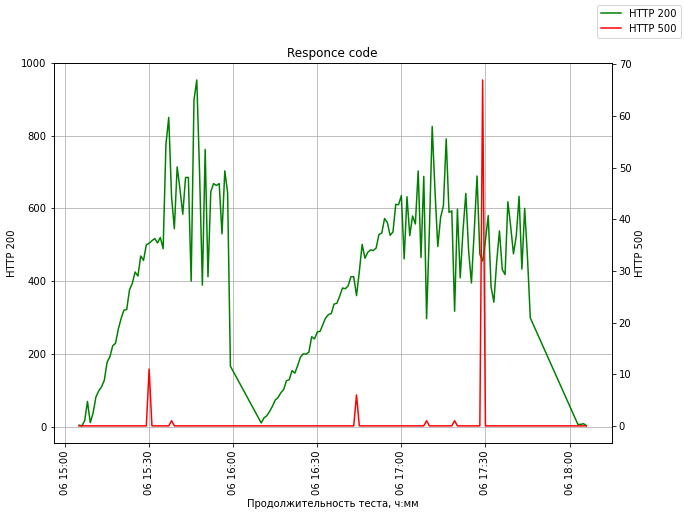

In [270]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(dates.MinuteLocator(interval=5))
ax1.grid(True)
plt.xticks(rotation=90)
ax1.set_title('Responce code')
ax1.set_xlabel('Продолжительность теста, ч:мм')
ax1.set_ylabel('HTTP 200')
ax1.plot(x,y,'g',label='HTTP 200')
ax2=ax1.twinx()
ax2.set_ylabel('HTTP 500')
ax2.plot(x,z,'r',label='HTTP 500')
fig.legend()
plt.show()

In [271]:
df2 = df.loc[df["DateTime"].between("2015-02-06 00:00:00+03:00", "2015-02-06 23:59:59+03:00")]
df2['DateTime'] = pd.to_datetime(df["DateTime"].dt.strftime('%Y-%b-%d %H:%M'))

d:\Users\user\AppData\Local\Temp/ipykernel_2032/3528429572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['DateTime'] = pd.to_datetime(df["DateTime"].dt.strftime('%Y-%b-%d %H:%M'))


In [272]:
sqldf('select distinct Endpoint from df2')

,Endpoint
0,/gateway/services/SID0003418/1.00
1,/gateway/services/SID0003102/1.00
2,/gateway/services/SID0003572/1.00
3,/gateway/services/SID0003564/1.00
4,/gateway/services/SID0003048/wsdl
5,/mtom/handler
6,/gateway/services/SID0003048


In [273]:
df_3418 = df2.loc[df2['Endpoint'] == "/gateway/services/SID0003418/1.00"]
df_3418 = df_3418.groupby(['DateTime'], as_index=False)['Endpoint'].count()

In [274]:
df_3102 = df2.loc[df2['Endpoint'] == "/gateway/services/SID0003102/1.00"]
df_3102 = df_3102.groupby(['DateTime'], as_index=False)['Endpoint'].count()

In [275]:
df_3572 = df2.loc[df2['Endpoint'] == "/gateway/services/SID0003572/1.00"]
df_3572 = df_3572.groupby(['DateTime'], as_index=False)['Endpoint'].count()

In [276]:
df_3564 = df2.loc[df2['Endpoint'] == "/gateway/services/SID0003564/1.00"]
df_3564 = df_3564.groupby(['DateTime'], as_index=False)['Endpoint'].count()

In [277]:
df_endpoints = df2['DateTime']

In [278]:
df_endpoints = pd.merge(df_endpoints,df_3418[['DateTime','Endpoint']],on='DateTime', how='left')
df_endpoints = pd.merge(df_endpoints,df_3102[['DateTime','Endpoint']],on='DateTime', how='left')
df_endpoints = pd.merge(df_endpoints,df_3572[['DateTime','Endpoint']],on='DateTime', how='left')
df_endpoints = pd.merge(df_endpoints,df_3564[['DateTime','Endpoint']],on='DateTime', how='left')
df_endpoints.columns = ['DateTime', '3418', '3102', '3572', '3564']

d:\Users\user\AppData\Local\Temp/ipykernel_2032/733200281.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Endpoint_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_endpoints = pd.merge(df_endpoints,df_3564[['DateTime','Endpoint']],on='DateTime', how='left')


In [279]:
df_endpoints['3418'] = df_endpoints['3418'].fillna(0)
df_endpoints['3102'] = df_endpoints['3102'].fillna(0)
df_endpoints['3572'] = df_endpoints['3572'].fillna(0)
df_endpoints['3564'] = df_endpoints['3564'].fillna(0)

In [280]:
x = df_endpoints['DateTime']
y = df_endpoints['3418']
z = df_endpoints['3102']
a = df_endpoints['3572']
b = df_endpoints['3564']

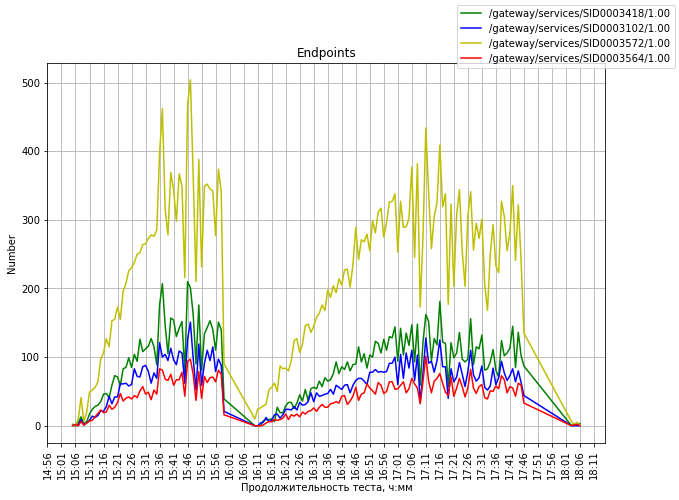

In [281]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(dates.MinuteLocator(interval=5))
ax1.grid(True)
plt.xticks(rotation=90)
ax1.set_title('Endpoints')
ax1.set_xlabel('Продолжительность теста, ч:мм')
ax1.set_ylabel('Number')
ax1.plot(x,y,'g',label='/gateway/services/SID0003418/1.00')
ax1.plot(x,z,'b',label='/gateway/services/SID0003102/1.00')
ax1.plot(x,a,'y',label='/gateway/services/SID0003572/1.00')
ax1.plot(x,b,'r',label='/gateway/services/SID0003564/1.00')
fig.legend()
plt.show()